#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# for checking our models performance (difference between, what was actual value and what our model predicted)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Handling missing values, Outliers and checking relation between numerical columns 

In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### As we can see there are a few outliers

<AxesSubplot:>

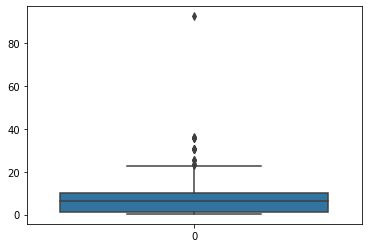

In [6]:
# Seaborn for better visvualization
# Checking for Present Price column
x = df.iloc[:, 3]
import seaborn as sns
sns.boxplot(x)

In [7]:
def detect_outliers_3(data, outlier_selling_price=[]):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outlier_selling_price.append(i)
    return outlier_selling_price

In [8]:
detect_outliers_3(x)

[35.96, 35.96, 35.96, 36.23, 92.6]

#### Here we can see that Present_Price have many outliers
* Extreme one is 92.6 lacs
* And Other outlier arfe also present which are little higher than the max of that column - 35.96, 35.96, 35.96, 36.23 lacs

In [9]:
df.loc[df['Present_Price'] >= 35]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0


<AxesSubplot:>

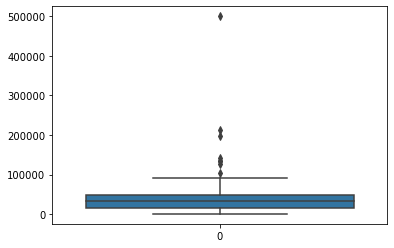

In [10]:
y = df.iloc[:, 4]
import seaborn as sns
sns.boxplot(y)

In [11]:
def detect_outliers_4(data, outlier_Present_Price=[]):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outlier_Present_Price.append(i)
    return outlier_Present_Price

In [12]:
y = df.iloc[:, 4]
detect_outliers_4(y)

[197176, 213000, 500000]

In [13]:
df[(df.Selling_Price >= 15) & (df.Present_Price >= 35)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0


#### In this dataset, we cannot say that these outliers are useless because as we can see here, selling price also has to do with the present price and the car brand, so decided to keep these outliers and check how model performs with these data

<AxesSubplot:>

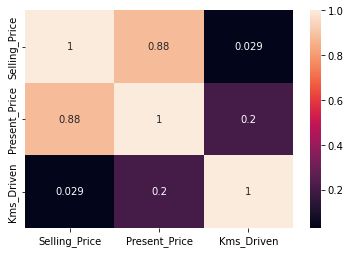

In [14]:
a = df.iloc[:, 2:5]
sns.heatmap(a.corr(), annot=True)

#### As we can see there is a high correlation between sp and pp but not between sp and kms
* For now we can drop that column before putting data into training but as we also know that (more the kms, less is the selling price as       more kms means that the car is used a lot)

In [15]:
a.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Name: Selling_Price, dtype: float64

#### Visvualizing through lmplot, to see the relationship

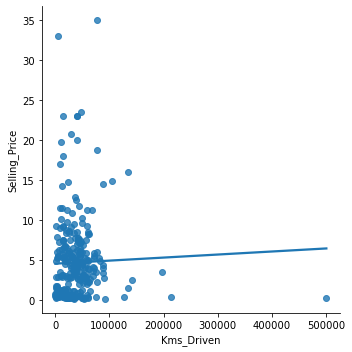

In [16]:
sns.lmplot(x = 'Kms_Driven', y = 'Selling_Price', data = df, fit_reg=True, ci=None)

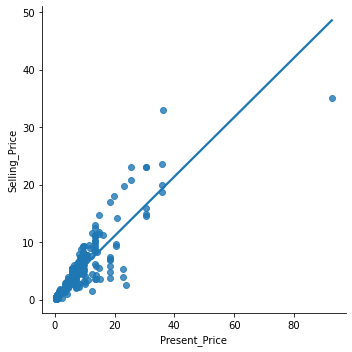

In [17]:
sns.lmplot(x = 'Present_Price', y = 'Selling_Price', data = df, fit_reg=True, ci=None)

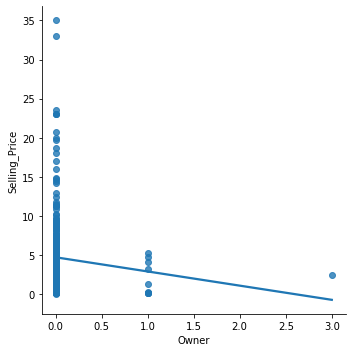

In [18]:
sns.lmplot(x = 'Owner', y = 'Selling_Price', data = df, fit_reg=True, ci=None)

#### As we can see here, owner column has no relation with the sellin price column so, we can drop this column

# Handling Categorical columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


#### Trying out map function to encode the categorical variables

In [21]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol' : 1, 'Diesel' : 2, 'CNG' : 3})
df['Seller_Type'] = df['Seller_Type'].map({'Dealer' : 1, 'Individual' : 2})
df['Transmission'] = df['Transmission'].map({'Manual' : 1, 'Automatic' : 2})

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [23]:
cat_feature = df.iloc[:, 5:8]
cat_feature['Selling_Price'] = df['Selling_Price']
cat_feature.corr()['Selling_Price']

Fuel_Type        0.509467
Seller_Type     -0.550724
Transmission     0.367128
Selling_Price    1.000000
Name: Selling_Price, dtype: float64

<AxesSubplot:>

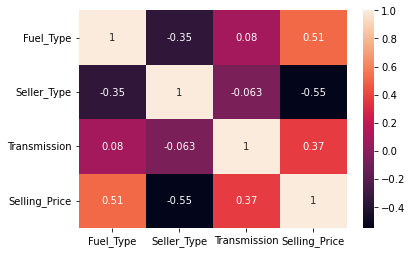

In [24]:
sns.heatmap(cat_feature.corr(), annot=True)

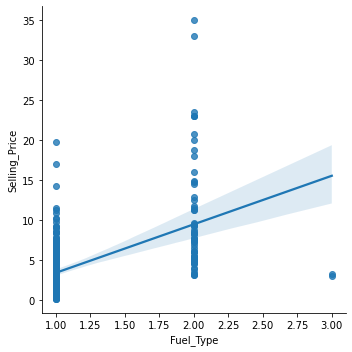

In [25]:
sns.lmplot(x = 'Fuel_Type', y = 'Selling_Price', data = cat_feature)

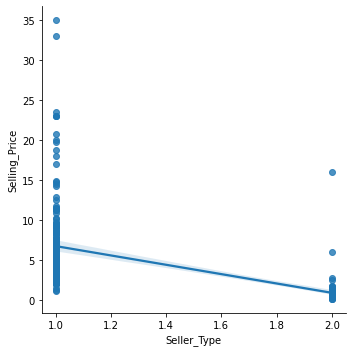

In [26]:
sns.lmplot(x = 'Seller_Type', y = 'Selling_Price', data = cat_feature)

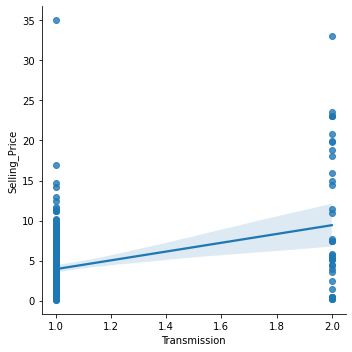

In [27]:
sns.lmplot(x = 'Transmission', y = 'Selling_Price', data = cat_feature)

#### Transmission 
#### 1 = Manual 
#### 2 = Automatic

In [28]:
cat_feature.groupby('Transmission')['Selling_Price'].count()

Transmission
1    261
2     40
Name: Selling_Price, dtype: int64

#### Fuel Type 
#### 1 = Petrol 
#### 2 = Diesel
#### 3 = CNG

In [29]:
cat_feature.groupby('Fuel_Type')['Selling_Price'].count()

Fuel_Type
1    239
2     60
3      2
Name: Selling_Price, dtype: int64

#### Seller Type 
#### 1 = Dealer 
#### 2 = Individual

In [30]:
cat_feature.groupby('Seller_Type')['Selling_Price'].count()

Seller_Type
1    195
2    106
Name: Selling_Price, dtype: int64

In [31]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Linear Regression with specific features, which I thought will be responsible for predictions

In [32]:
X = df[['Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = df['Selling_Price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 4)
x test:  (61, 4)
y train:  (240,)
y test:  (61,)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
predictions = model.predict(X_test)

In [38]:
X_test['Predictions'] = predictions

* Created a column in X_test to see the difference between Actual and Predictions

In [39]:
X_test['Actual'] = y_test
X_test

,Present_Price,Fuel_Type,Seller_Type,Transmission,Predictions,Actual
285,8.500,1,1,2,6.927123,7.40
248,4.600,1,1,1,3.264181,4.00
150,0.826,1,2,1,0.381380,0.50
217,4.430,1,1,1,3.192204,3.15
107,1.500,1,2,1,0.666746,1.25
...,...,...,...,...,...,...
62,35.960,2,1,2,20.200973,18.75
154,0.880,1,2,1,0.404243,0.50
218,9.400,1,1,1,5.296457,6.45
286,7.900,1,1,1,4.661371,5.65


# Checking the model's performance

# Mean_Absolute_Error 
* The mean for all recorded absolute errors (Average sum of all absolute errors).

In [25]:
m = [1, 2, 3, 4, 5, 6, 7]
n = [1, 3, 4, 5, 7, 6, 15]

In [26]:
import numpy as np

# We first calculated the difference in the two arrays (Actual, Predictions)
error = abs(np.subtract(m, n))
# Used abs to exclude the negative values

# Then summing the array
sumerror = error.sum()

# Dividing it to get a mean_absolute_error, lower the value, better the predictions, to understand this put a value in array and check
mae = sumerror/len(error)
mae

1.8571428571428572

#### Mean_Squared_Error
* Difference between predictions and the actual value
* Square the errors and averaging it.
* <b>Why we use this ?</b> It makes the difference larger, from this we understand that the errors are bigger or not

In [27]:
# Taking the same M and N that we used for MAE
error = (np.subtract(m, n))
sq_error = error ** 2
# Second method - sq_error2 = pow(error, 2)
sum_sq_error = np.sum(sq_error)
mse = sum_sq_error / len(sq_error)
mse

10.142857142857142

#### What is variance?

In terms of linear regression, variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low. What low means is quantified by the r2 score (explained below).

#### R-squared

R-Squared measures how much of the dependent variable variation is explained by the independent variables in the model.<br>
The value of R-square lies between 0 to 1.<br>
1 = No difference between the actual and predicted values<br>
0 = Huge differences between these values<br>
r2 = 1 - ((y_pred - y_mean)**2) / ((y_actual - y_mean)**2)

In [66]:
from sklearn.metrics import r2_score
r2_score(m, n)

-1.5357142857142856

In [40]:
mae = mean_absolute_error(y_test, X_test['Predictions'])
mse = mean_squared_error(y_test, X_test['Predictions'])
r2 = r2_score(y_test, X_test['Predictions'])



print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.2174043772753305
MSE is 4.593878130879843
R2 score is 0.7882437728174388


#### Plotting the Predictions and Actual values

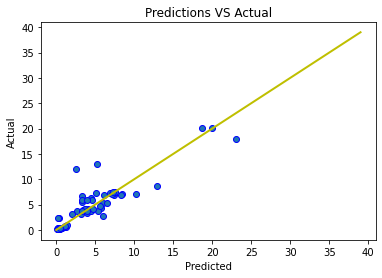

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x = range(0, 40, 1)
y = range(0, 40, 1)

ax.scatter(y_test, X_test['Predictions'], edgecolors=(0, 0, 1))
ax.plot(x, y, 'y', linewidth=2)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predictions VS Actual')
plt.show()

In [42]:
X_train.describe()

,Present_Price,Fuel_Type,Seller_Type,Transmission
count,240.000000,240.000000,240.000000,240.000000
mean,7.657100,1.208333,1.350000,1.120833
std,8.833125,0.417120,0.477966,0.326615
min,0.320000,1.000000,1.000000,1.000000
25%,1.350000,1.000000,1.000000,1.000000
50%,6.250000,1.000000,1.000000,1.000000
75%,9.900000,1.000000,2.000000,1.000000
max,92.600000,3.000000,2.000000,2.000000


# Model 2 - Checking other features
* People also buy car based on the fuel type so, checking it with Present price

In [43]:
X1 = df[['Present_Price', 'Fuel_Type']]
y1 = df['Selling_Price']

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=1)

print("x train: ",X_train1.shape)
print("x test: ",X_test1.shape)
print("y train: ",y_train1.shape)
print("y test: ",y_test1.shape)

x train:  (240, 2)
x test:  (61, 2)
y train:  (240,)
y test:  (61,)


In [45]:
model2 = LinearRegression()

In [46]:
model2.fit(X_train1, y_train1)

LinearRegression()

In [47]:
predictions2 = model2.predict(X_test1)

In [48]:
X_test1['Predictions'] = predictions2

In [49]:
X_test1['Actual'] = y_test1
X_test1.head()

,Present_Price,Fuel_Type,Predictions,Actual
285,8.500,1,4.727234,7.40
248,4.600,1,2.861133,4.00
150,0.826,1,1.055322,0.50
217,4.430,1,2.779790,3.15
107,1.500,1,1.377822,1.25


In [50]:
mae = mean_absolute_error(y_test1, X_test1['Predictions'])
mse = mean_squared_error(y_test1, X_test1['Predictions'])
r2 = r2_score(y_test1, X_test1['Predictions'])



print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.2668406889345079
MSE is 4.293212414200006
R2 score is 0.8021030516213956


* Comparing these two models - MAE and MSE does not change a lot but we can see a better performance
* Can conclude that some predictions may have improved but still not a very huge difference

# Model 3 
Taking the above features as it was comparatively improved and adding KMS_Driven feature, as we know more the kms, old is the vehicle and could affect the selling price

In [51]:
X2 = df[['Present_Price', 'Fuel_Type', 'Kms_Driven']]
y2 = df['Selling_Price']

In [52]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
X2 = scaler.fit_transform(X2)

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=1)

print("x train: ",X_train2.shape)
print("x test: ",X_test2.shape)
print("y train: ",y_train2.shape)
print("y test: ",y_test2.shape)

x train:  (240, 3)
x test:  (61, 3)
y train:  (240,)
y test:  (61,)


In [54]:
model3 = LinearRegression()

In [55]:
model3.fit(X_train2, y_train2)

LinearRegression()

In [56]:
predictions3 = model3.predict(X_test2)

In [57]:
mae = mean_absolute_error(y_test2, predictions3)
mse = mean_squared_error(y_test2, predictions3)
r2 = r2_score(y_test2, predictions3)



print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.2000508540414436
MSE is 3.4111083319189364
R2 score is 0.8427639109486323


* As we observed, it did improved the model's prediction compared to other 2 models

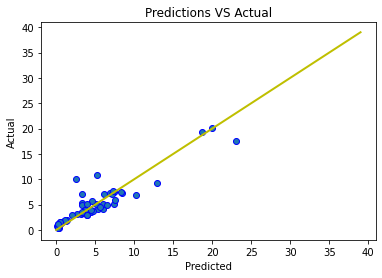

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x = range(0, 40, 1)
y = range(0, 40, 1)

ax.scatter(y_test2, predictions3, edgecolors=(0, 0, 1))
ax.plot(x, y, 'y', linewidth=2)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predictions VS Actual')
plt.show()

# Conclusion
* Selecting important features is important and domain knowledge of the dataset also helps alot
* Visvualizing the data and understanding the relationship is also very important